In [1]:
from CustomPongEnv_v0_ram import Custom_Pong

In [2]:
env = Custom_Pong()
env.observation_space, env.action_space

(Box([  0.   0. -10. -10.   0. -10.], [160. 210.  10.  10. 210.  10.], (6,), float32),
 Discrete(3))

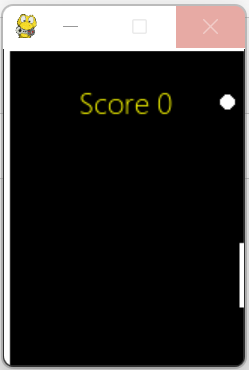

In [3]:
states=env.observation_space.shape[0]
actions=env.action_space.n
states,actions

(6, 3)

In [4]:
episodes = 2
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score=0
    while not done:
        env.render()
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        score+=reward
        print(reward)
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1
Episode:1 Score:-1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
states=env.observation_space.shape[0]
actions=env.action_space.n
states,actions

In [ ]:
import numpy as np
import tensorflow as tensorflow 
from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from rl.agents import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory

In [ ]:
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

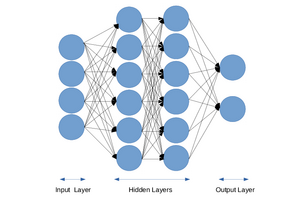

In [ ]:
# del model

In [ ]:
model = build_model(states, actions)
model.summary()

In [ ]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=100, target_model_update=1e-2)
    return dqn

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-4))

In [ ]:
dqn.fit(env, nb_steps=100000, visualize=False, verbose=1)
dqn.save_weights('SavedWeights/10k-Fast/dqn_weights.h5f')

In [ ]:
dqn.load_weights('SavedWeights/10k-Fast/dqn_weights.h5f')

In [ ]:
scores = dqn.test(env, nb_episodes=2, visualize=True)
print(np.mean(scores.history['episode_reward']))

In [ ]:
env.close()